In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

import warnings
warnings.filterwarnings('ignore')

In [5]:
for dirname , _,filenames in os.walk('C:\\Users\\udit hasija\\Downloads\\rating.csv'):
    for filename in filenames:
        print(os.path.join(dirname , filename))

C:\Users\udit hasija\Downloads\rating.csv\anime.csv
C:\Users\udit hasija\Downloads\rating.csv\rating.csv


In [6]:
anime_path = 'C:\\Users\\udit hasija\\Downloads\\rating.csv\\anime.csv'
rating_path = 'C:\\Users\\udit hasija\\Downloads\\rating.csv\\rating.csv'

In [7]:
anime_data = pd.read_csv(anime_path)
rating_data = pd.read_csv(rating_path)

In [8]:
print("Shape of anime data is (row , column):" + str(anime_data.shape))
print(anime_data.info())

Shape of anime data is (row , column):(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [9]:
print("Shape of Rating Data is (row , column:)" + str(rating_data.shape))
print(rating_data.info())

Shape of Rating Data is (row , column:)(7813737, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


# Missing Values

In [10]:
print('Missing values in Anime Data(%) are: \n')
print(round(anime_data.isnull().sum().sort_values(ascending= False)/len(anime_data.index),4)*100)
print("*"*50)
print('Missing values in Rating Data(%) are: \n')
print(round(rating_data.isnull().sum().sort_values(ascending=False)/len(rating_data.index),4)*100)


Missing values in Anime Data(%) are: 

rating      1.87
genre       0.50
type        0.20
anime_id    0.00
name        0.00
episodes    0.00
members     0.00
dtype: float64
**************************************************
Missing values in Rating Data(%) are: 

user_id     0.0
anime_id    0.0
rating      0.0
dtype: float64


In [11]:
print(anime_data['type'].mode())
print(anime_data['genre'].mode())

0    TV
Name: type, dtype: object
0    Hentai
Name: genre, dtype: object


In [12]:
# deleting anime with 0 rating
anime_data=anime_data[~np.isnan(anime_data["rating"])]

# filling mode value for genre and type
anime_data['genre'] = anime_data['genre'].fillna(anime_data['genre'].dropna().mode().values[0])

anime_data['type'] = anime_data['type'].fillna(anime_data['type'].dropna().mode().values[0])

#checking if all null values are filled
anime_data.isnull().sum()                                                                         

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [13]:
anime_data['genre'] = anime_data['genre'].fillna(anime_data['genre'].dropna().mode().values[0])

# Merge

In [14]:
anime_fulldata = pd.merge(anime_data, rating_data , on='anime_id')

In [15]:
anime_fulldata = anime_fulldata.rename(columns={'name':'anime_title' , 'genre':'anime_genre' ,'rating_x':'Rating','rating_y':'user_rating'})

In [16]:
print(anime_fulldata.head())

   anime_id     anime_title                           anime_genre   type  \
0     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
1     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
2     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
3     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
4     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   

  episodes  Rating  members  user_id  user_rating  
0        1    9.37   200630       99            5  
1        1    9.37   200630      152           10  
2        1    9.37   200630      244           10  
3        1    9.37   200630      271           10  
4        1    9.37   200630      278           -1  


In [17]:
# Creating a dataframe for rating counts
anime_ratingCount = (anime_fulldata.
     groupby(by = ['anime_title'])['user_rating'].
     count().
     reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']]
    )


top10_animerating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)

Text(0, 0.5, 'User Rating count')

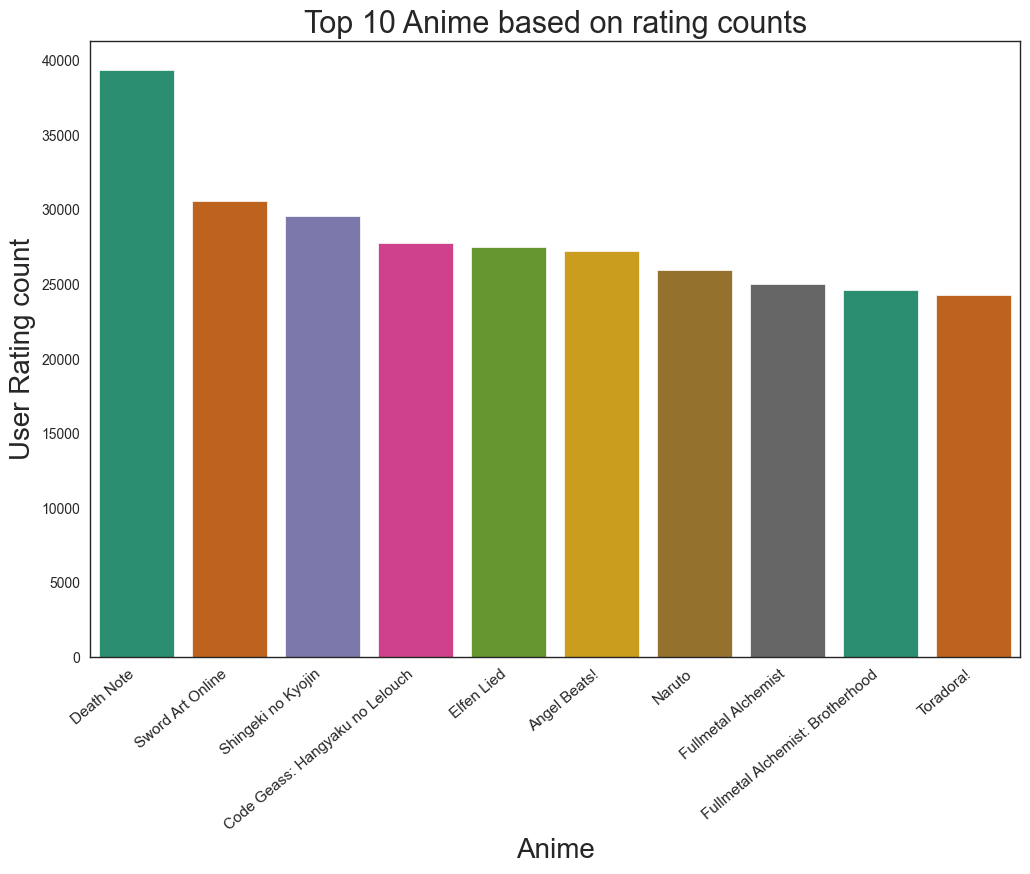

In [18]:
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)

In [19]:
anime_fulldata = anime_fulldata.merge(anime_ratingCount, left_on = 'anime_title', right_on = 'anime_title', how = 'left')
anime_fulldata = anime_fulldata.rename(columns={'user_rating_x': 'user_rating', 'user_rating_y': 'totalratingcount'})

In [20]:
duplicate_anime=anime_fulldata.copy()
duplicate_anime.drop_duplicates(subset ="anime_title", 
                     keep = 'first', inplace = True)

Text(0, 0.5, 'Community Size')

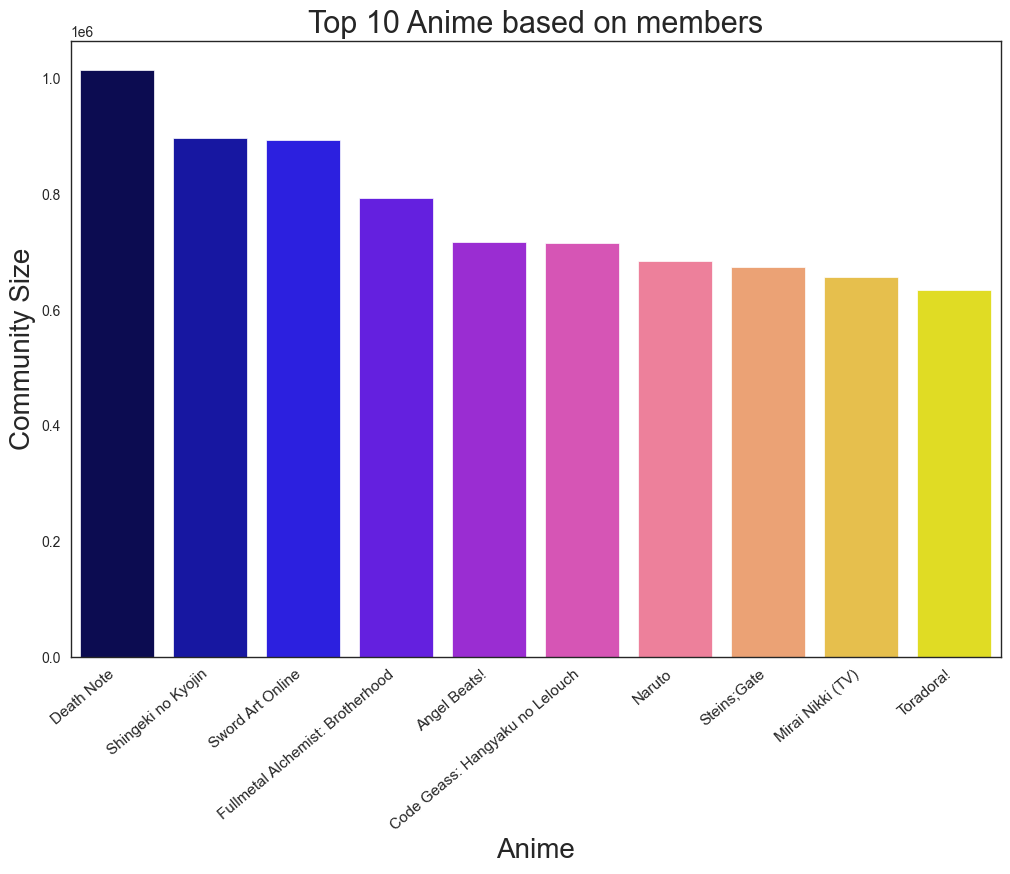

In [21]:
top10_animemembers=duplicate_anime[['anime_title', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="members", data=top10_animemembers, palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('Community Size', fontsize = 20)

Text(0.5, 1.0, 'Rating of users')

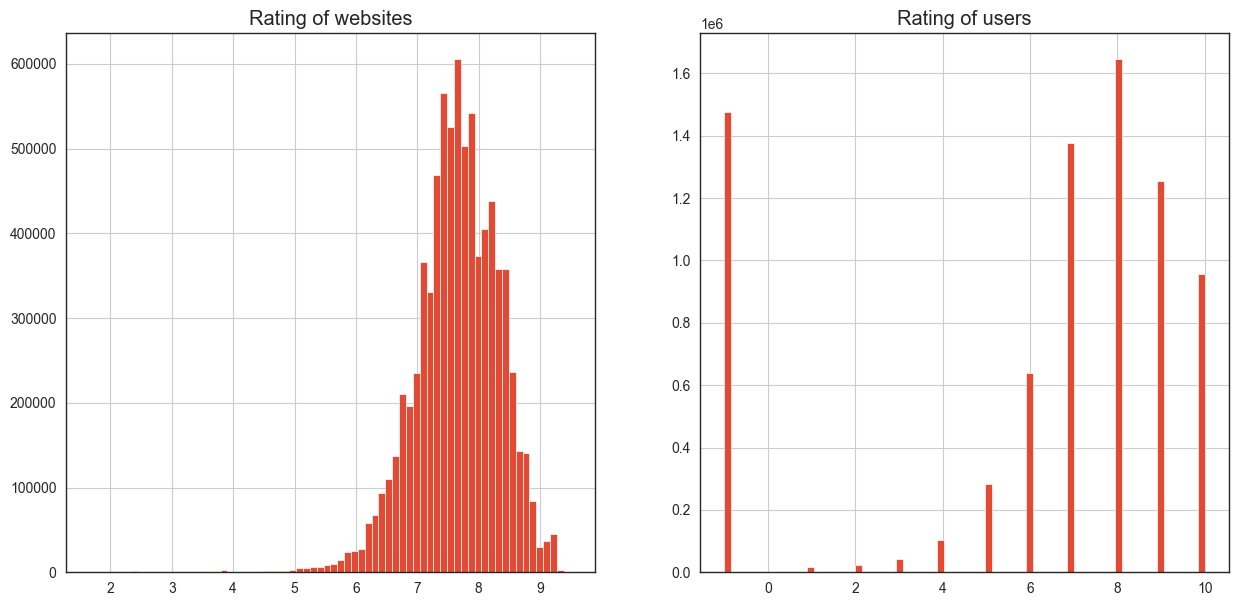

In [22]:
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
anime_fulldata['Rating'].hist(bins=70)
plt.title("Rating of websites")
plt.subplot(1,2,2)
anime_fulldata['user_rating'].hist(bins=70)
plt.title("Rating of users")

In [23]:
import plotly.graph_objects as go
labels = anime_fulldata['type'].value_counts().index
values = anime_fulldata['type'].value_counts().values
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Medium of Streaming",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

(-0.5, 799.5, 399.5, -0.5)

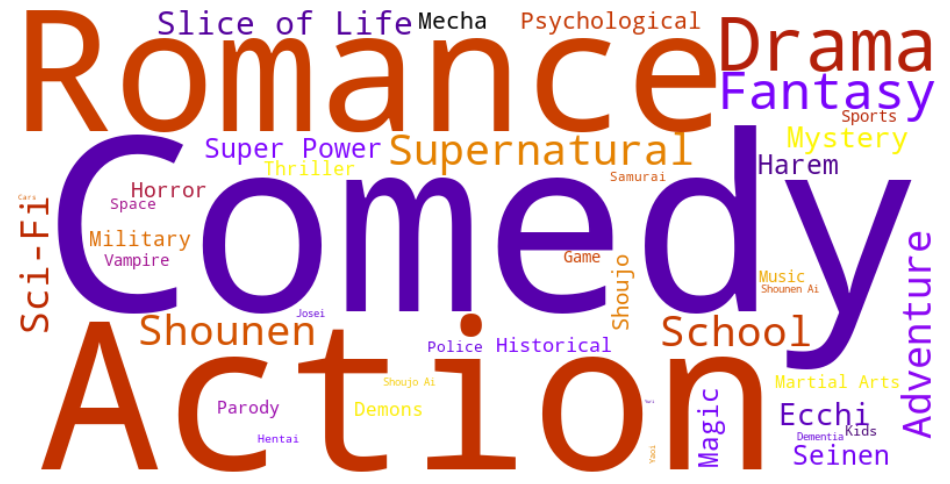

In [24]:
#Sharingan copy: https://www.kaggle.com/indralin/try-content-based-and-collaborative-filtering
nonull_anime=anime_fulldata.copy()
nonull_anime.dropna(inplace=True)
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['anime_genre']:
    for anime_genre in genres.split(','):
        all_genres[anime_genre.strip()] += 1
        
from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

In [25]:
anime_feature=anime_fulldata.copy()
anime_feature['user_id'].value_counts()

user_id
48766    10226
42635     3747
53698     2905
57620     2702
59643     2633
         ...  
57180        1
42128        1
56249        1
23657        1
64425        1
Name: count, Length: 73515, dtype: int64

In [26]:
counts = anime_feature['user_id'].value_counts()
anime_feature = anime_feature[anime_feature['user_id'].isin(counts[counts >= 200].index)]

In [27]:
anime_pivot=anime_feature.pivot_table(index='anime_title',columns='user_id',values='user_rating').fillna(0)
anime_pivot.head()

user_id,5,7,17,38,43,46,54,123,129,139,160,198,201,210,226,232,233,235,244,248,250,256,261,270,271,282,285,288,294,296,301,308,317,321,326,341,342,352,372,373,375,379,385,392,395,407,418,428,431,435,436,438,439,446,447,455,460,462,477,478,492,497,500,511,529,530,531,540,541,547,551,552,553,565,567,572,573,574,578,585,593,598,611,622,634,637,651,656,659,660,661,662,670,680,684,687,692,694,702,721,735,741,746,750,760,761,762,768,771,774,783,784,786,788,795,799,804,806,811,813,814,819,820,844,847,861,862,890,894,916,917,920,924,926,932,936,937,940,943,946,954,958,963,979,995,996,1007,1013,1019,1020,1026,1027,1028,1031,1035,1044,1048,1055,1058,1074,1084,1103,1114,1116,1119,1132,1140,1145,1146,1153,1160,1163,1169,1176,1180,1188,1190,1191,1195,1202,1210,1213,1216,1222,1223,1232,1235,1237,1244,1252,1274,1280,1284,1287,1289,1305,1306,1309,1322,1324,1327,1332,1338,1344,1349,1350,1354,1366,1378,1385,1396,1400,1404,1410,1418,1419,1425,1435,1441,1442,1450,1456,1482,1489,1495,1497,1501,1504,1505,1517,1522,1530,1539,1541,1549,1551,1558,1570,1576,1578,1579,1585,1589,1593,1600,1605,1619,1620,1623,1647,...,71655,71673,71699,71706,71731,71739,71749,71754,71761,71766,71770,71780,71790,71792,71794,71796,71804,71808,71812,71816,71817,71819,71821,71822,71844,71850,71854,71862,71871,71877,71882,71886,71893,71895,71896,71898,71901,71908,71932,71936,71942,71943,71945,71947,71951,71960,71968,71971,71973,71974,71977,71984,71999,72002,72007,72019,72021,72035,72042,72043,72049,72052,72054,72059,72060,72095,72103,72107,72111,72115,72124,72126,72130,72141,72196,72200,72212,72253,72254,72255,72263,72264,72266,72268,72280,72294,72305,72306,72317,72329,72347,72350,72358,72371,72400,72404,72409,72468,72502,72511,72512,72516,72520,72526,72527,72528,72541,72549,72554,72610,72627,72630,72646,72661,72663,72664,72677,72682,72685,72694,72715,72746,72756,72759,72760,72767,72776,72786,72787,72789,72794,72797,72800,72811,72814,72817,72826,72828,72846,72851,72857,72872,72875,72884,72889,72928,72935,72936,72941,72944,72945,72946,72947,72954,72959,72960,72968,72997,73005,73012,73018,73031,73058,73070,73073,73075,73080,73086,73088,73099,73101,73111,73114,73123,73128,73132,73135,73152,73153,73155,73158,73159,73160,73161,73162,73177,73179,73187,73188,73193,73197,73203,73206,73212,73216,73221,73234,73242,73247,73248,73251,73257,73260,73262,73264,73272,73276,73278,73282,73284,73286,73288,73298,73301,73308,73317,73320,73324,73325,73328,73329,73340,73341,73343,73346,73350,73356,73359,73362,73376,73378,73379,73380,73389,73395,73406,73408,73417,73422,73457,73460,73462,73476,73477,73485,73491,73499,73502,73503,73507
anime_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

# Cosine Similarity

In [28]:
from scipy.sparse import csr_matrix

anime_matrix = csr_matrix(anime_pivot.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [29]:
query_index = np.random.choice(anime_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

1905


In [30]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Detective Conan Movie 19: The Hellfire Sunflowers:

1: Detective Conan Movie 18: The Sniper from Another Dimension, with distance of 0.3002045925709713:
2: Detective Conan Movie 17: Private Eye in the Distant Sea, with distance of 0.3708420649515297:
3: Detective Conan Movie 16: The Eleventh Striker, with distance of 0.44468178766342736:
4: Detective Conan Movie 20: The Darkest Nightmare, with distance of 0.46754682077135024:
5: Detective Conan Movie 15: Quarter of Silence, with distance of 0.4758528033664118:


# Cleaning

In [31]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

anime_data['name'] = anime_data['name'].apply(text_cleaning)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
anime_data['genre'] = anime_data['genre'].fillna('')
genres_str = anime_data['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

In [33]:
tfv_matrix.shape

(12064, 1547)

In [34]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [35]:
indices = pd.Series(anime_data.index, index=anime_data['name']).drop_duplicates()

In [36]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    anime_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Rating': anime_data['rating'].iloc[anime_indices].values ,
                                 'Type': anime_data['type'].iloc[anime_indices].values})

In [37]:
give_rec('Naruto: Shippuuden')

,Anime name,Rating,Type
0,Naruto: Shippuuden,7.94,TV
1,Naruto,7.81,TV
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.68,Special
3,Naruto x UT,7.58,OVA
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.53,Movie
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.50,Movie
6,Naruto Shippuuden: Sunny Side Battle,7.26,Special
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,7.11,Movie
8,Battle Spirits: Ryuuko no Ken,4.89,OVA
9,Kyutai Panic Adventure!,5.21,Special


In [38]:
give_rec('Steins;Gate')

,Anime name,Rating,Type
0,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,8.61,Movie
1,Steins;Gate: Oukoubakko no Poriomania,8.46,Special
2,Steins;Gate: Kyoukaimenjou no Missing Link - D...,8.34,Special
3,Under the Dog,6.55,OVA
4,Loups=Garous,6.43,Movie
5,Loups=Garous Pilot,5.87,Special
6,Ibara no Ou,7.24,Movie
7,Arve Rezzle: Kikaijikake no Yousei-tachi,6.44,Movie
8,Higashi no Eden,8.03,TV
9,Paprika,8.15,Movie
